In [1]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import level_finder as lf
import data_visualization as dv
import level_category as lc
from sklearn.cluster import KMeans

In [2]:
abf_A1 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_11_0000.abf")
abf_A2 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_11_0002.abf")
abf_A3 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_12_0001.abf")
abf_A4 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_15_0001.abf")
abf_A5 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_18_0000.abf")

abf_B1 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_19_0001.abf")
abf_B2 = pyabf.ABF("/media/xjtu/7A68EF0368EEBCCF/DNA sequencing/2024_04_19_0002.abf")

In [3]:
abf_A1 = lf.downsample(abf_A1, 100)
abf_A2 = lf.downsample(abf_A2, 100)
abf_A3 = lf.downsample(abf_A3, 100)
abf_A4 = lf.downsample(abf_A4, 100)
abf_A5 = lf.downsample(abf_A5, 100)
abf_B1 = lf.downsample(abf_B1, 100)
abf_B2 = lf.downsample(abf_B2, 100)

In [4]:
i_ranges_A1, t_ranges_A1 = lf.find_events(abf_A1)
i_ranges_A2, t_ranges_A2 = lf.find_events(abf_A2)
i_ranges_A3, t_ranges_A3 = lf.find_events(abf_A3)
i_ranges_A4, t_ranges_A4 = lf.find_events(abf_A4)
i_ranges_A5, t_ranges_A5 = lf.find_events(abf_A5)
i_ranges_B1, t_ranges_B1 = lf.find_events(abf_B1)
i_ranges_B2, t_ranges_B2 = lf.find_events(abf_B2)

In [5]:
with open('outputs/events_ranges.txt', 'w') as file:
    file.write("A1 时间范围： " + str(t_ranges_A1)+ "\n" + " index范围: " + str(i_ranges_A1) + "\n")
    file.write("A2 时间范围： " + str(t_ranges_A2)+ "\n" + " index范围: " + str(i_ranges_A2) + "\n")
    file.write("A3 时间范围： " + str(t_ranges_A3)+ "\n" + " index范围: " + str(i_ranges_A3) + "\n")
    file.write("A4 时间范围： " + str(t_ranges_A4)+ "\n" + " index范围: " + str(i_ranges_A4) + "\n")
    file.write("A5 时间范围： " + str(t_ranges_A5)+ "\n" + " index范围: " + str(i_ranges_A5) + "\n")
    file.write("B1 时间范围： " + str(t_ranges_B1)+ "\n" + " index范围: " + str(i_ranges_B1) + "\n")
    file.write("B2 时间范围： " + str(t_ranges_B2)+ "\n" + " index范围: " + str(i_ranges_B2) + "\n")

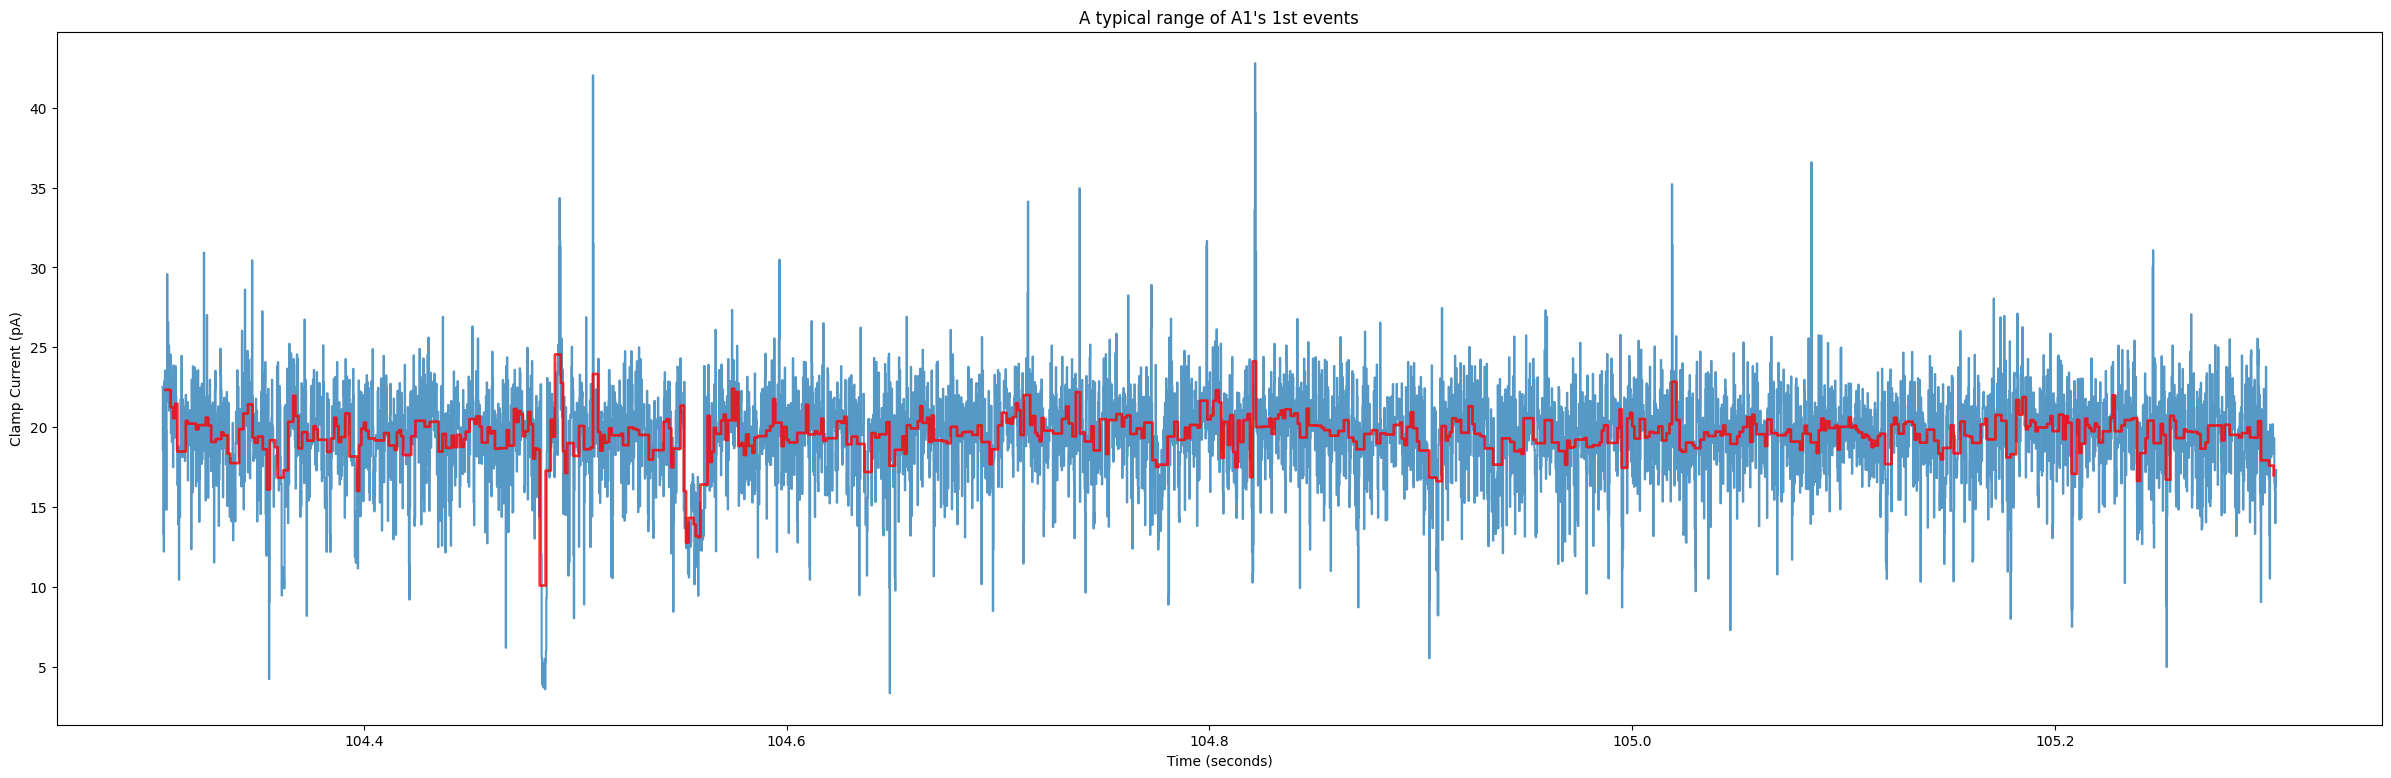

In [6]:
# 计算变点
# change_points_A1 = lf.change_points(abf_A1, i_ranges_A1)
# with open("outputs/change_points_A1.txt", "w") as f:
#     f.write(str(change_points_A1))

# 读取变点
with open("outputs/change_points_A1.txt", "r") as file:
    change_points_A1 = eval(file.read())

lvl_A1 = lf.calc_level(abf_A1, change_points_A1[0])
lvl_A1.to_csv("outputs/lvl_A1.csv", index=False)

# Typical 为 True 时，表示使用中间[2000:4000]index的数据作为典型数据, 大约是第0.4到0.8秒
fig = dv.step_abf_lvls(
    abf_A1, lvl_A1, typical=True, title_prefix="A typical range of A1's 1st events"
)
fig.savefig("outputs/A1_1st_events_typical.png")

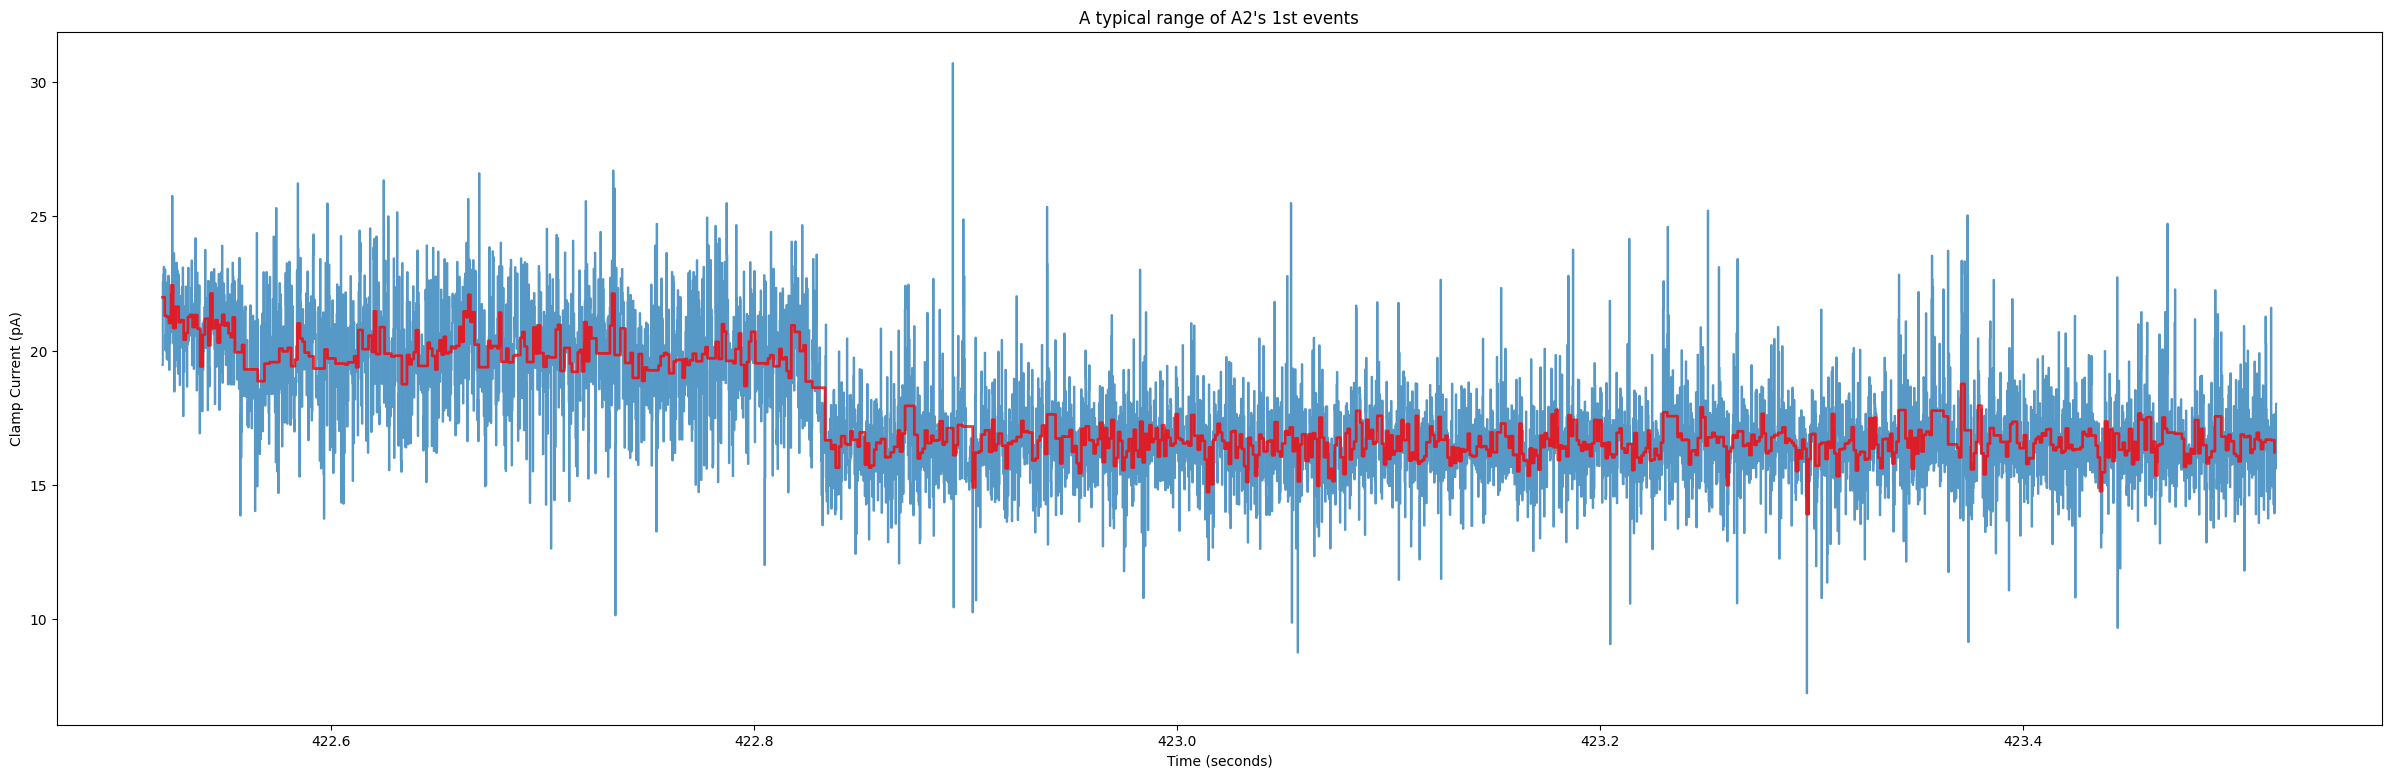

In [7]:
# 由于A2的第一个事件的变点范围较大 120s ，所以临时手动指定变点范围
# A2的第一个事件的变点范围为的起点不变，终点加上50000 index 约10s
# temp_ranges = [(i_ranges_A2[0][0], i_ranges_A2[0][0] + 50000)]
# chane_points_A2 = lf.change_points(abf_A2, temp_ranges)
# with open("outputs/change_points_A2.txt", "w") as f:
#     f.write(str(chane_points_A2))

# 读取变点
with open("outputs/change_points_A2.txt", "r") as file:
    change_points_A2 = eval(file.read())

lvl_A2 = lf.calc_level(abf_A2, change_points_A2[0])
lvl_A2.to_csv("outputs/lvl_A2.csv",index=False)

fig = dv.step_abf_lvls(abf_A2, lvl_A2, typical=True,title_prefix="A typical range of A2's 1st events")
fig.savefig("outputs/A2_1st_events_typical.png")

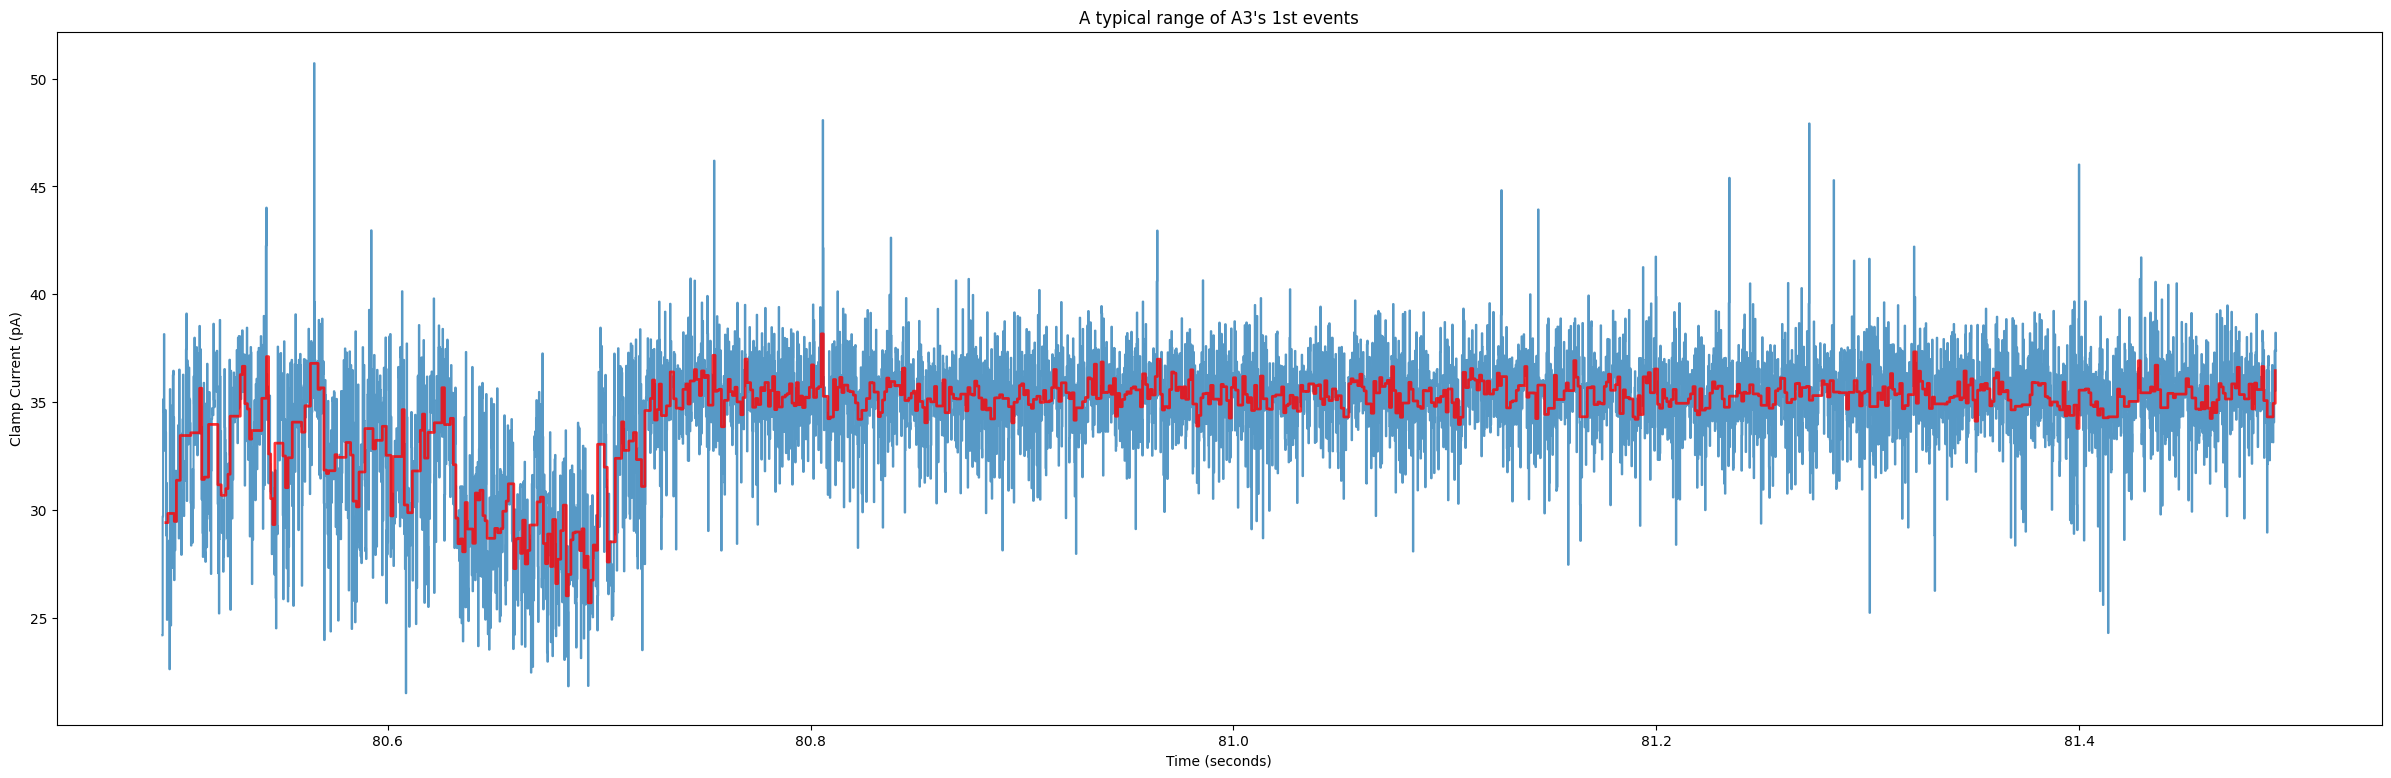

In [8]:
# temp_ranges = [(i_ranges_A3[0][0], i_ranges_A3[0][0] + 50000)]
# change_points_A3 = lf.change_points(abf_A3, temp_ranges)
# with open("outputs/change_points_A3.txt", "w") as f:
#     f.write(str(change_points_A3))

# 读取变点
with open("outputs/change_points_A3.txt", "r") as file:
    change_points_A3 = eval(file.read())

lvl_A3 = lf.calc_level(abf_A3, change_points_A3[0])
lvl_A3.to_csv("outputs/lvl_A3.csv",index=False)

fig = dv.step_abf_lvls(abf_A3, lvl_A3, typical=True,title_prefix="A typical range of A3's 1st events")
fig.savefig("outputs/A3_1st_events_typical.png")

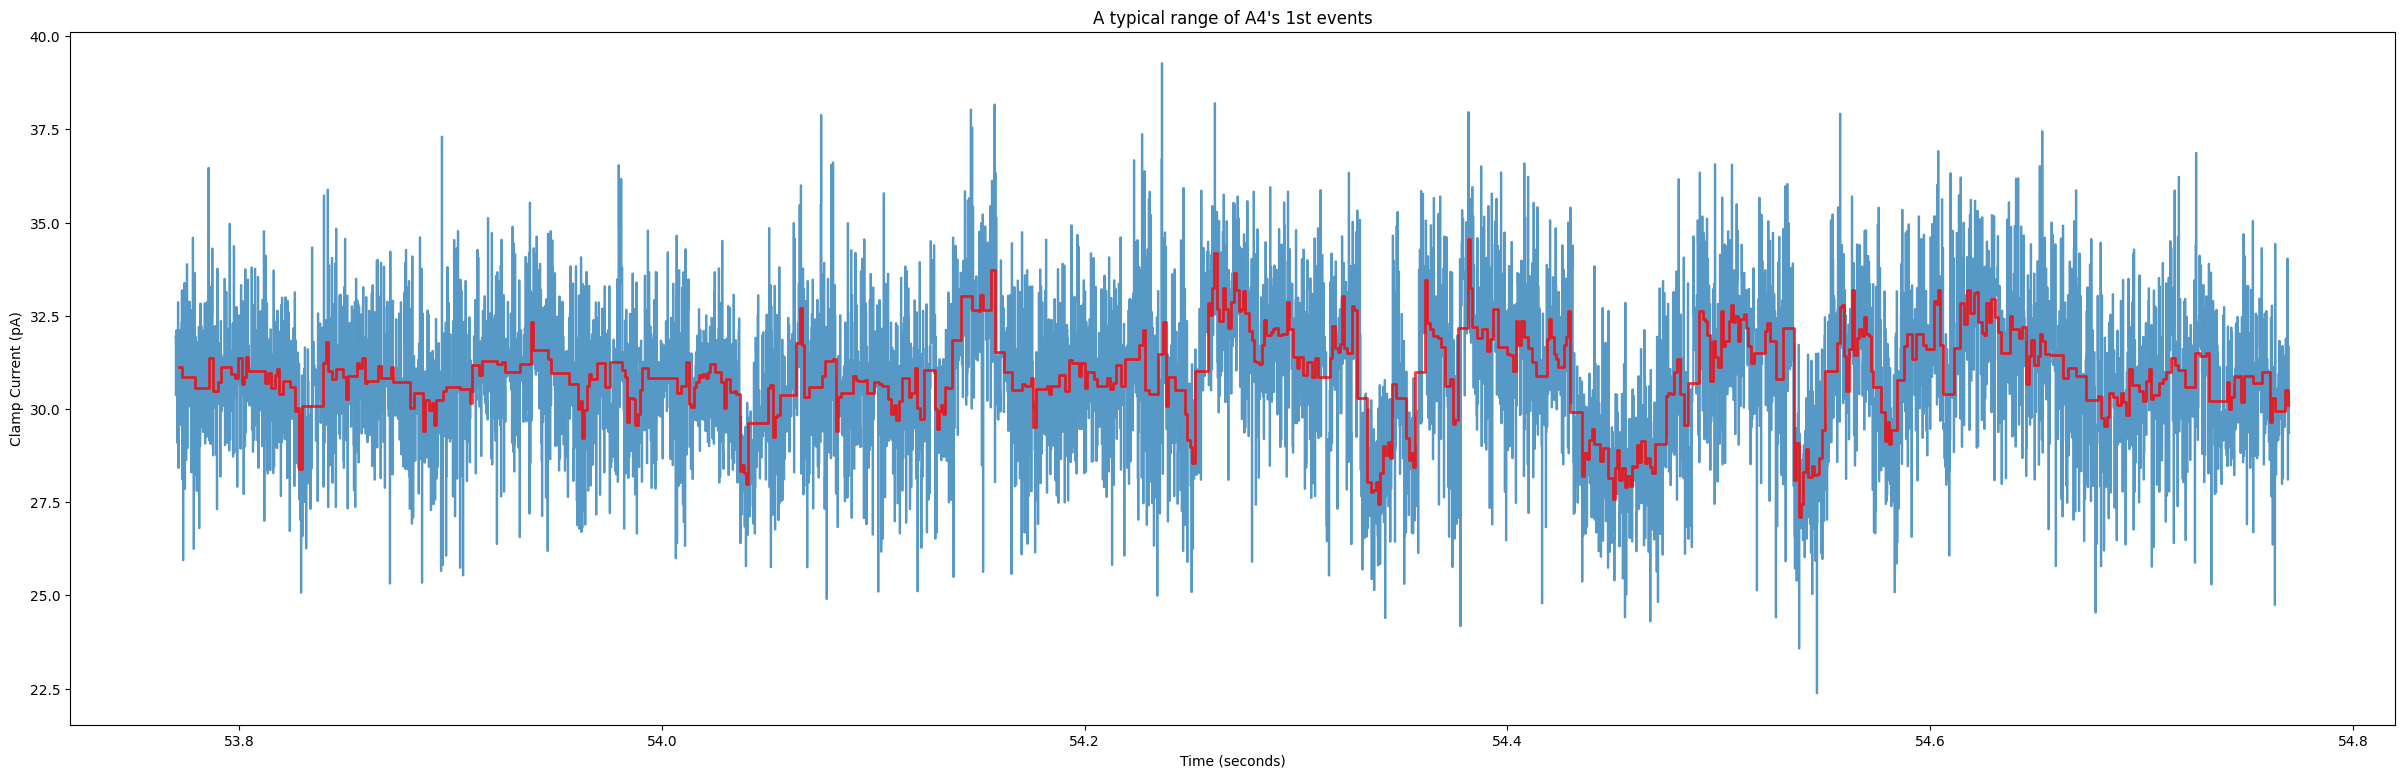

In [9]:
# temp_ranges = [(i_ranges_A4[0][0], i_ranges_A4[0][0] + 50000)]
# change_points_A4 = lf.change_points(abf_A4, temp_ranges)
# with open("outputs/change_points_A4.txt", "w") as f:
#     f.write(str(change_points_A4))

# 读取变点
with open("outputs/change_points_A4.txt", "r") as file:
    change_points_A4 = eval(file.read())

lvl_A4 = lf.calc_level(abf_A4, change_points_A4[0])
lvl_A4.to_csv("outputs/lvl_A4.csv",index=False)

fig = dv.step_abf_lvls(abf_A4, lvl_A4, typical=True,title_prefix="A typical range of A4's 1st events")
fig.savefig("outputs/A4_1st_events_typical.png")

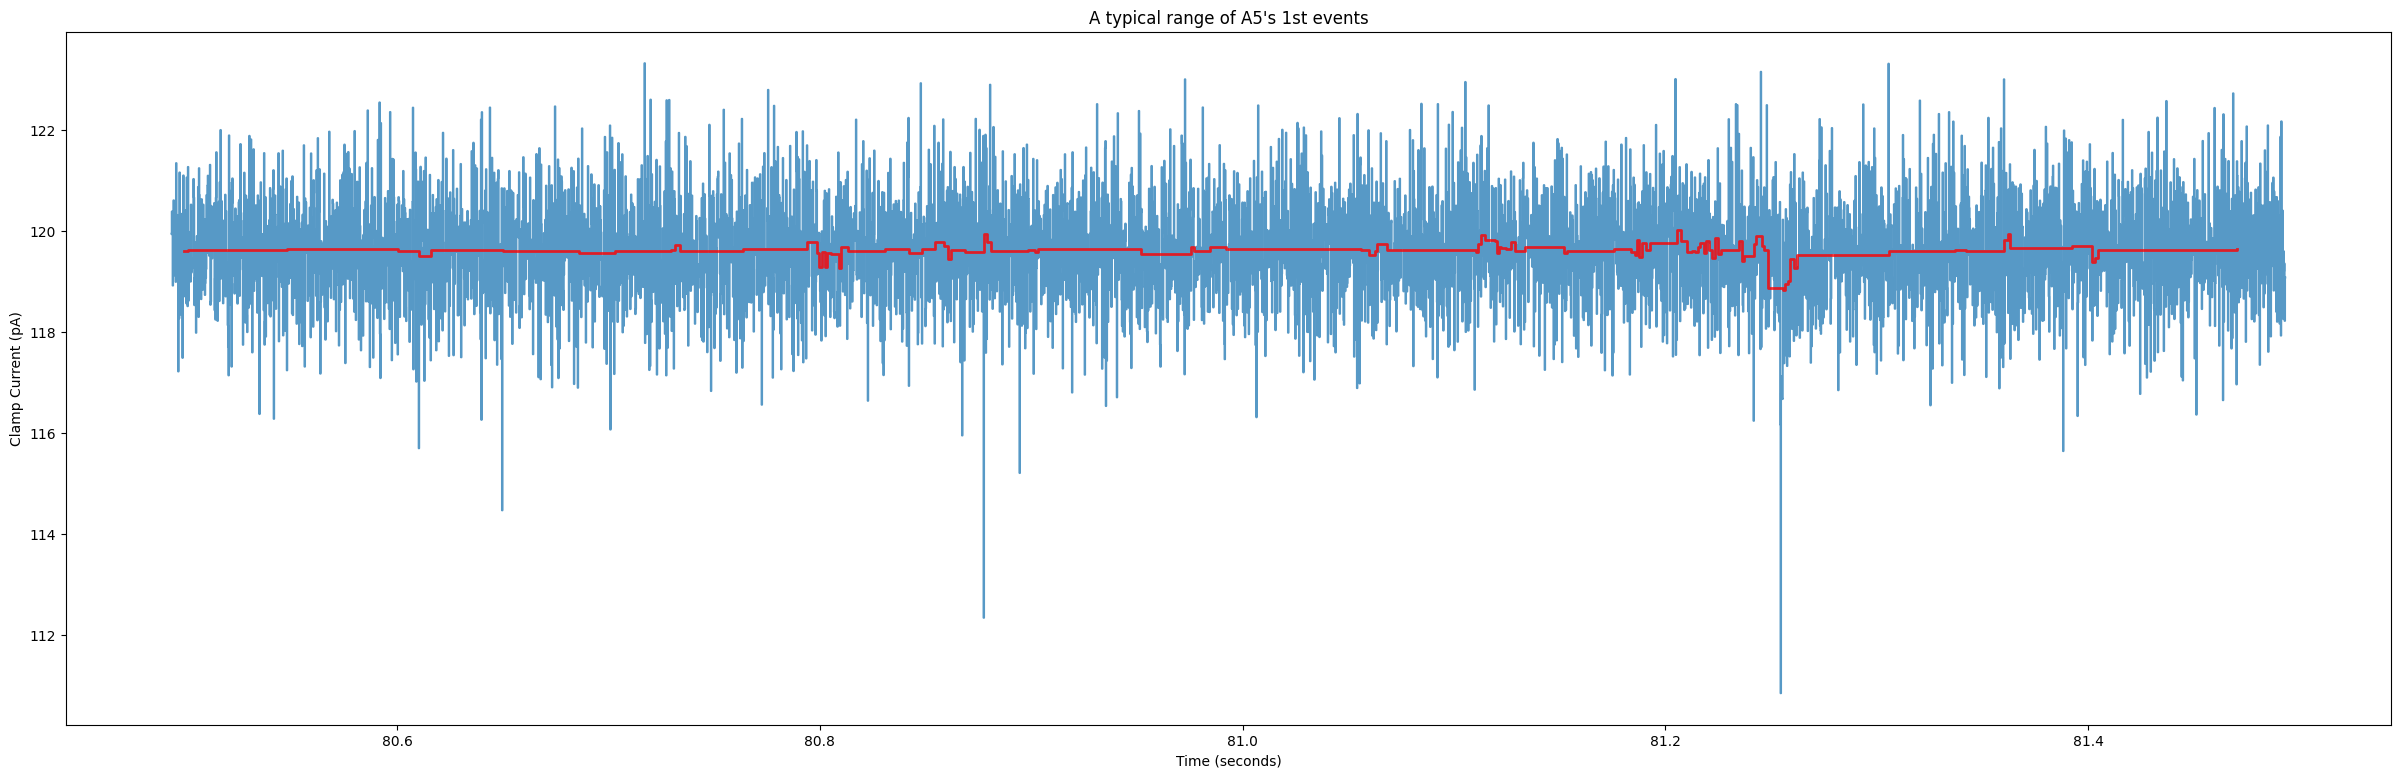

In [10]:
# temp_ranges = [(i_ranges_A3[0][0], i_ranges_A3[0][0] + 50000)]
# change_points_A5 = lf.change_points(abf_A5, temp_ranges)
# with open("outputs/change_points_A5.txt", "w") as f:
#     f.write(str(change_points_A5))

# 读取变点
with open("outputs/change_points_A5.txt", "r") as file:
    change_points_A5 = eval(file.read())

lvl_A5 = lf.calc_level(abf_A5, change_points_A5[0])
lvl_A5.to_csv("outputs/lvl_A5.csv",index=False)

fig = dv.step_abf_lvls(abf_A5, lvl_A5, typical=True,title_prefix="A typical range of A5's 1st events")
fig.savefig("outputs/A5_1st_events_typical.png")

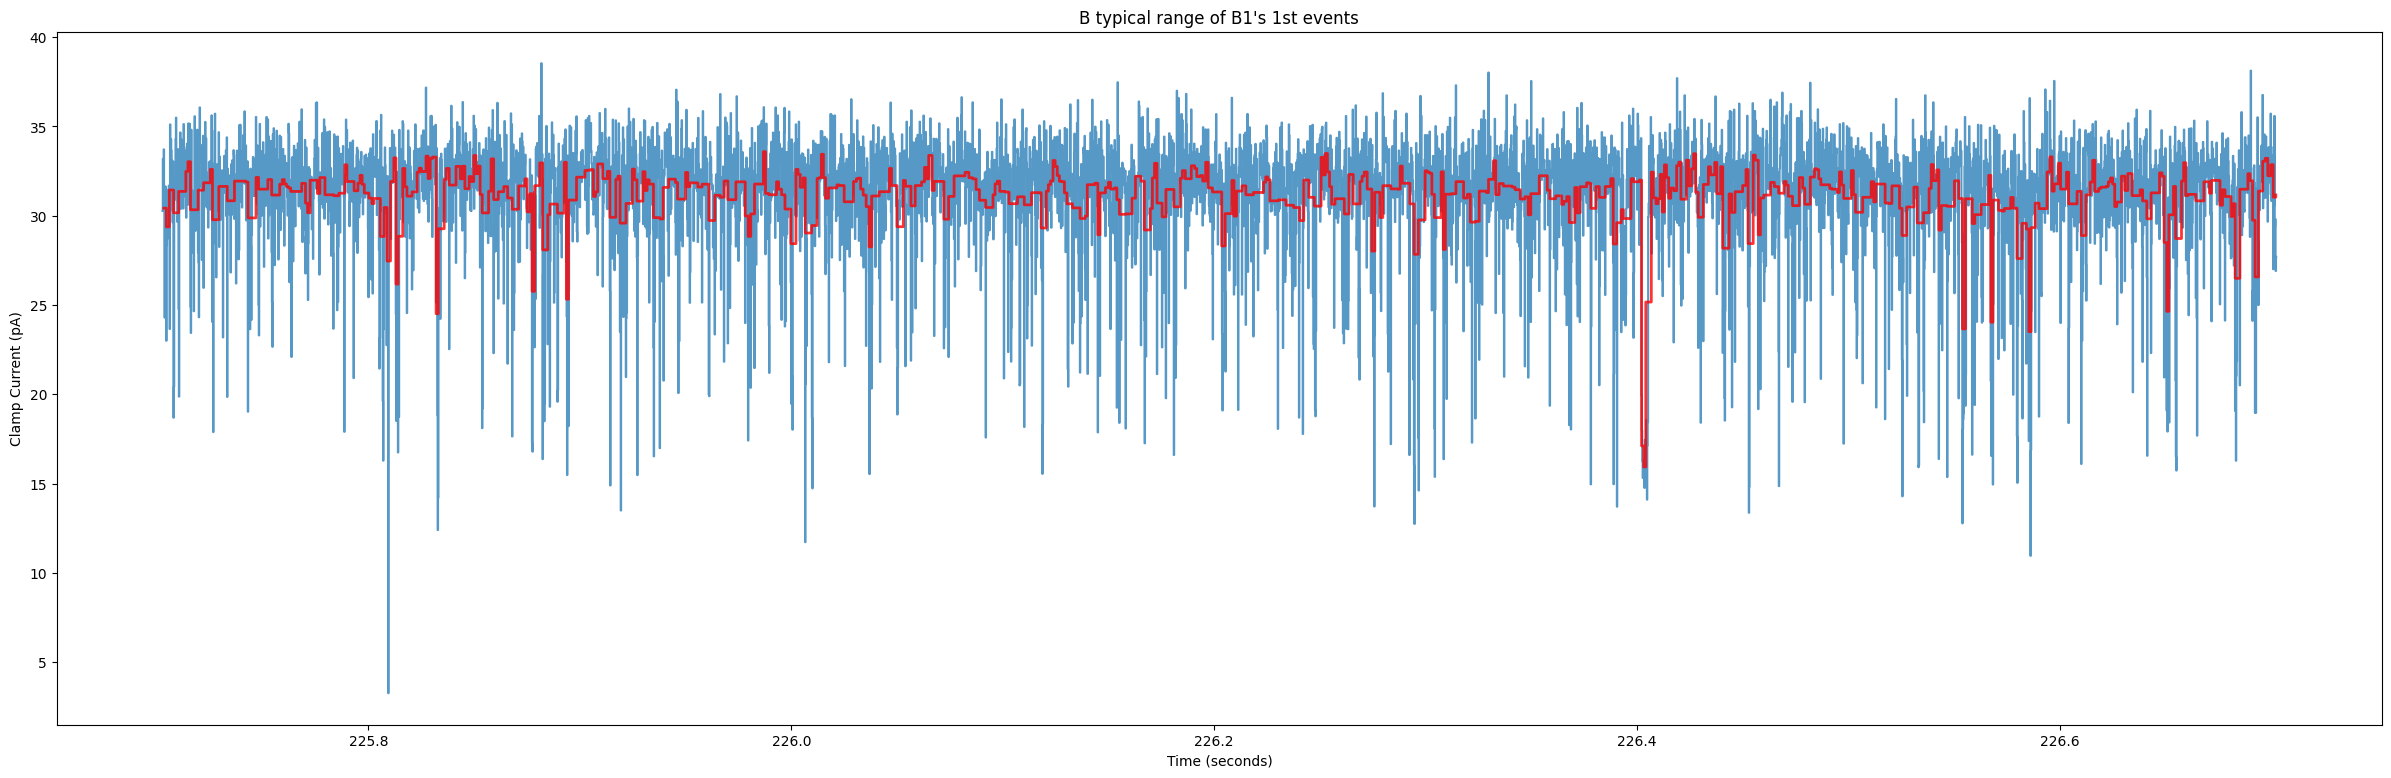

In [11]:
# change_points_B1 = lf.change_points(abf_B1, i_ranges_B1)
# with open("outputs/change_points_B1.txt", "w") as f:
#     f.write(str(change_points_B1))

# 读取变点
with open("outputs/change_points_B1.txt", "r") as file:
    change_points_B1 = eval(file.read())

lvl_B1 = lf.calc_level(abf_B1, change_points_B1[0])
lvl_B1.to_csv("outputs/lvl_B1.csv",index=False)

fig = dv.step_abf_lvls(abf_B1, lvl_B1, typical=True,title_prefix="B typical range of B1's 1st events")
fig.savefig("outputs/B1_1st_events_typical.png")

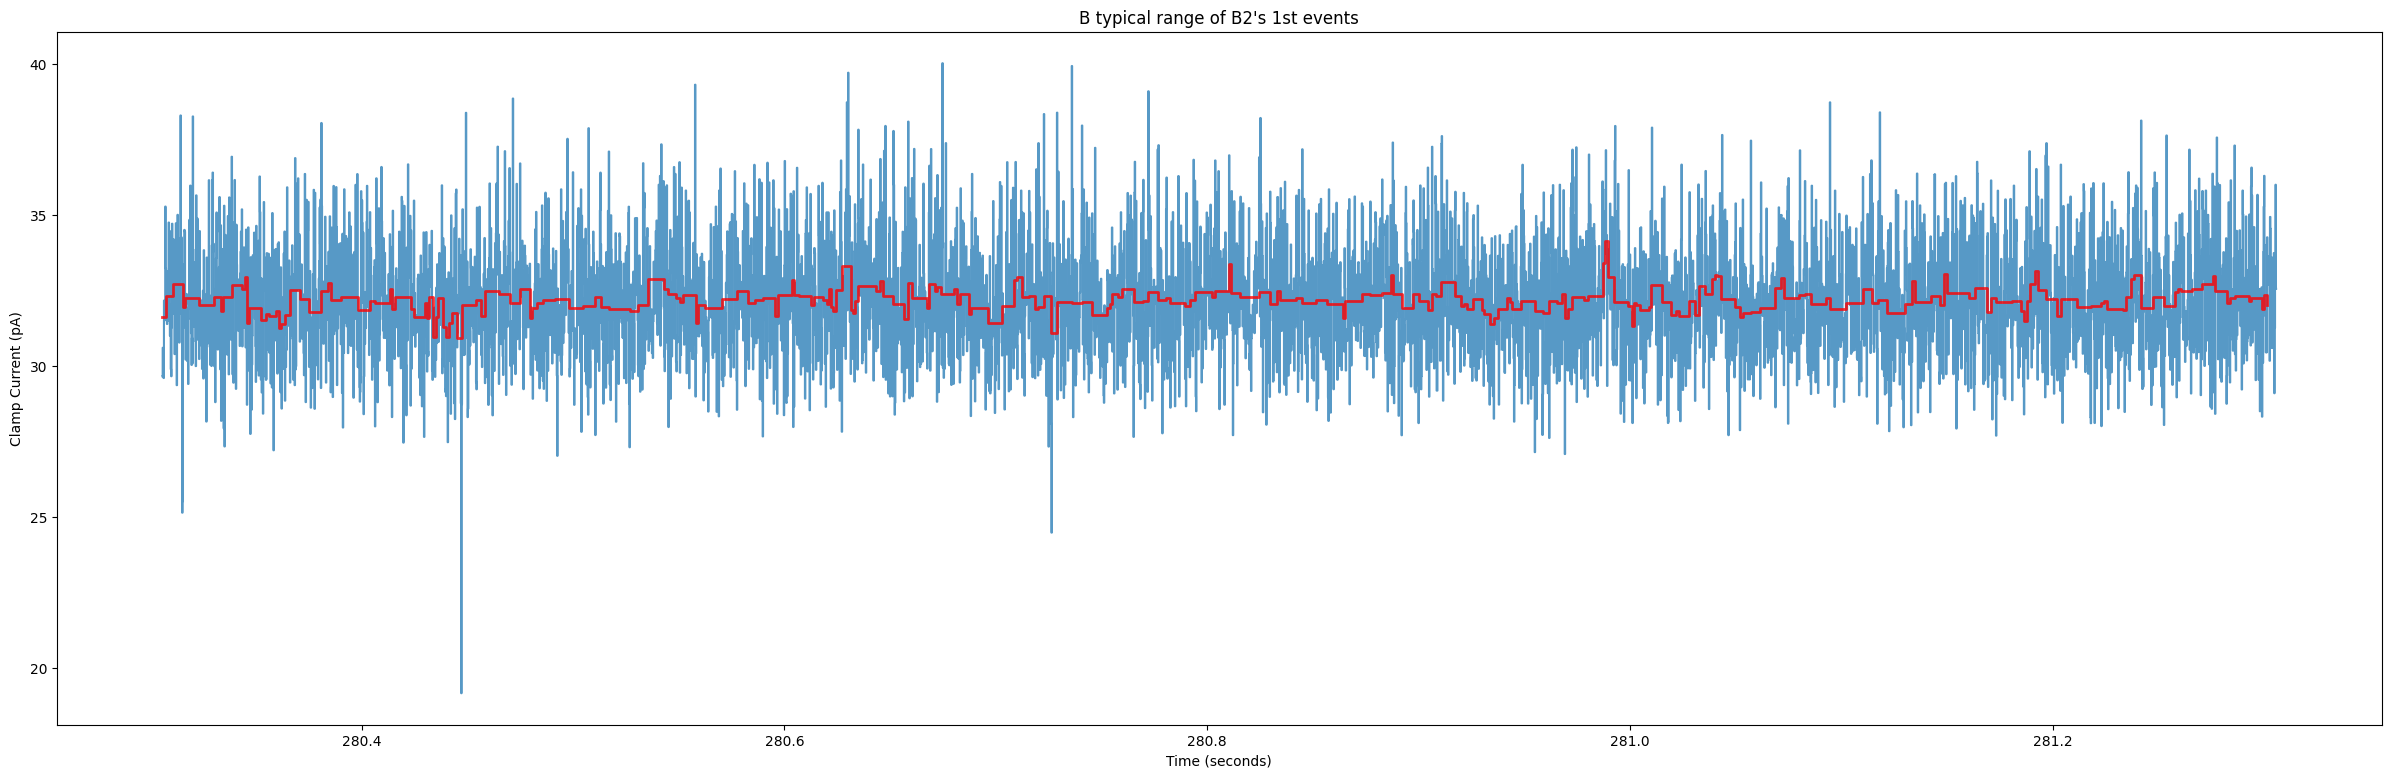

In [12]:
# chaneg_points_B2 = lf.change_points(abf_B2, i_ranges_B2)
# with open("outputs/change_points_B2.txt", "w") as f:
#     f.write(str(chaneg_points_B2))

# 读取变点
with open("outputs/change_points_B2.txt", "r") as file:
    change_points_B2 = eval(file.read())

lvl_B2 = lf.calc_level(abf_B2, change_points_B2[0])
lvl_B2.to_csv("outputs/lvl_B2.csv",index=False)

fig = dv.step_abf_lvls(abf_B2, lvl_B2, typical=True,title_prefix="B typical range of B2's 1st events")
fig.savefig("outputs/B2_1st_events_typical.png")

In [13]:
seq_A='PAAAAAAACCTTCCXTTTTCCCGTCCGCTCGTTCGCGCCTGTCTGCTTGTTTGCGTGTGCCGGTCGGCTAAGCATTCTCATGCAGGTCGTAGCC'
seq_B='PAAAAAAACCTTCCXTGTTTGCGTGTGCCGGTCGGCTGGTTGGCGGGTGGGCCCATCAAAACACTCATAAGCATTCTCATGCAGGTCGTAGCC'

ref_seqs_map = {
    "AAAA": 45.8,
    "AAAC": 42.1,
    "AAAG": 47.5,
    "AAAT": 46.4,
    "AACA": 46.4,
    "AACC": 39.3,
    "AACG": 41.6,
    "AACT": 39.7,
    "AAGA": 47.5,
    "AAGC": 41.5,
    "AAGG": 45.2,
    "AAGT": 44.4,
    "AATA": 40.2,
    "AATC": 35.2,
    "AATG": 39.4,
    "AATT": 36.7,
    "ACAA": 46.4,
    "ACAC": 43.4,
    "ACAG": 44.7,
    "ACAT": 45.2,
    "ACCA": 42.7,
    "ACCC": 40.7,
    "ACCG": 46.3,
    "ACCT": 41.5,
    "ACGA": 46.6,
    "ACGC": 39.7,
    "ACGG": 44.5,
    "ACGT": 42.3,
    "ACTA": 41.9,
    "ACTC": 37.4,
    "ACTG": 40.1,
    "ACTT": 36.1,
    "AGAA": 56.3,
    "AGAC": 45.0,
    "AGAG": 54.1,
    "AGAT": 47.7,
    "AGCA": 49.1,
    "AGCC": 41.8,
    "AGCG": 51.7,
    "AGCT": 44.0,
    "AGGA": 47.9,
    "AGGC": 38.3,
    "AGGG": 41.8,
    "AGGT": 37.4,
    "AGTA": 31.5,
    "AGTC": 24.3,
    "AGTG": 34.6,
    "AGTT": 27.3,
    "ATAA": 44.6,
    "ATAC": 42.5,
    "ATAG": 42.0,
    "ATAT": 42.8,
    "ATCA": 37.2,
    "ATCC": 35.3,
    "ATCG": 39.8,
    "ATCT": 37.4,
    "ATGA": 36.4,
    "ATGC": 30.7,
    "ATGG": 36.0,
    "ATGT": 33.0,
    "ATTA": 31.6,
    "ATTC": 26.4,
    "ATTG": 31.4,
    "CAAA": 46.4,
    "CAAC": 43.5,
    "CAAG": 47.5,
    "CAAT": 43.2,
    "CACA": 47.1,
    "CACC": 40.6,
    "CACG": 39.7,
    "CACT": 41.1,
    "CAGA": 47.7,
    "CAGC": 37.0,
    "CAGG": 42.9,
    "CAGT": 37.4,
    "CATA": 42.8,
    "CATC": 35.3,
    "CATG": 38.9,
    "CATT": 31.4,
    "CCAA": 45.3,
    "CCAC": 42.7,
    "CCAG": 43.7,
    "CCAT": 43.3,
    "CCCA": 46.3,
    "CCCC": 42.6,
    "CCCG": 43.0,
    "CCCT": 37.8,
    "CCGA": 46.3,
    "CCGC": 40.7,
    "CCGG": 43.2,
    "CCGT": 38.0,
    "CCTA": 43.9,
    "CCTC": 37.8,
    "CCTG": 34.1,
    "CCTT": 32.8,
    "CGAA": 51.3,
    "CGAC": 42.4,
    "CGAG": 46.4,
    "CGAT": 44.4,
    "CGCA": 47.8,
    "CGCC": 40.2,
    "CGCG": 43.1,
    "CGCT": 40.7,
    "CGGA": 40.7,
    "CGGC": 33.5,
    "CGGG": 36.2,
    "CGGT": 31.6,
    "CGTA": 27.0,
    "CGTC": 16.8,
    "CGTG": 21.8,
    "CGTT": 17.7,
    "CTAA": 47.3,
    "CTAC": 40.4,
    "CTAG": 44.8,
    "CTAT": 37.0,
    "CTCA": 44.1,
    "CTCC": 37.5,
    "CTCG": 35.7,
    "CTCT": 38.6,
    "CTGA": 34.3,
    "CTGC": 27.5,
    "CTGG": 34.1,
    "CTGT": 24.5,
    "CTTA": 31.2,
    "CTTC": 22.1,
    "CTTG": 27.4,
    "CTTT": 24.0,
    "GAAA": 56.3,
    "GAAC": 44.6,
    "GAAG": 48.7,
    "GAAT": 48.6,
    "GACA": 45.8,
    "GACC": 38.7,
    "GACG": 42.2,
    "GACT": 39.7,
    "GAGA": 47.4,
    "GAGC": 43.3,
    "GAGG": 43.4,
    "GAGT": 45.4,
    "GATA": 41.0,
    "GATC": 33.9,
    "GATG": 39.4,
    "GATT": 35.6,
    "GCAA": 49.1,
    "GCAC": 38.7,
    "GCAG": 48.0,
    "GCAT": 38.9,
    "GCCA": 44.4,
    "GCCC": 41.5,
    "GCCG": 43.2,
    "GCCT": 41.3,
    "GCGA": 47.2,
    "GCGC": 38.6,
    "GCGG": 45.6,
    "GCGT": 37.2,
    "GCTA": 36.8,
    "GCTC": 33.7,
    "GCTG": 36.0,
    "GCTT": 31.6,
    "GGAA": 51.8,
    "GGAC": 41.8,
    "GGAG": 46.7,
    "GGAT": 44.1,
    "GGCA": 43.7,
    "GGCC": 40.0,
    "GGCG": 42.3,
    "GGCT": 37.9,
    "GGGA": 41.8,
    "GGGC": 31.3,
    "GGGG": 30.2,
    "GGGT": 30.7,
    "GGTA": 28.0,
    "GGTC": 17.8,
    "GGTG": 25.5,
    "GGTT": 20.3,
    "GTAA": 40.3,
    "GTAC": 38.5,
    "GTAG": 38.0,
    "GTAT": 37.4,
    "GTCA": 35.7,
    "GTCC": 27.4,
    "GTCG": 30.6,
    "GTCT": 28.5,
    "GTGA": 33.5,
    "GTGC": 24.4,
    "GTGG": 22.9,
    "GTGT": 26.9,
    "GTTA": 29.5,
    "GTTC": 21.2,
    "GTTG": 27.5,
    "GTTT": 22.2,
    "TAAA": 44.6,
    "TAAC": 42.5,
    "TAAG": 47.6,
    "TAAT": 50.5,
    "TACA": 44.4,
    "TACC": 42.5,
    "TACG": 42.3,
    "TACT": 43.2,
    "TAGA": 45.8,
    "TAGC": 41.3,
    "TAGG": 44.0,
    "TAGT": 41.8,
    "TATA": 40.7,
    "TATC": 36.1,
    "TATG": 37.9,
    "TATT": 35.0,
    "TCAA": 43.7,
    "TCAC": 39.7,
    "TCAG": 46.3,
    "TCAT": 48.1,
    "TCCA": 43.7,
    "TCCC": 38.6,
    "TCCG": 39.3,
    "TCCT": 41.2,
    "TCGA": 46.4,
    "TCGC": 40.4,
    "TCGG": 40.0,
    "TCGT": 37.9,
    "TCTA": 42.1,
    "TCTC": 34.6,
    "TCTG": 32.8,
    "TCTT": 32.4,
    "TGAA": 45.6,
    "TGAC": 38.5,
    "TGAG": 42.4,
    "TGAT": 43.3,
    "TGCA": 42.8,
    "TGCC": 35.4,
    "TGCG": 40.6,
    "TGCT": 37.3,
    "TGGA": 38.7,
    "TGGC": 32.1,
    "TGGG": 33.7,
    "TGGT": 27.1,
    "TGTA": 27.1,
    "TGTC": 17.6,
    "TGTG": 21.7,
    "TGTT": 18.8,
    "TTAA": 40.1,
    "TTAC": 35.6,
    "TTAG": 41.8,
    "TTAT": 40.6,
    "TTCA": 36.0,
    "TTCC": 28.7,
    "TTCG": 33.2,
    "TTCT": 32.4,
    "TTGA": 33.1,
    "TTGC": 27.3,
    "TTGG": 32.1,
    "TTGT": 28.8,
    "TTTA": 29.2,
    "TTTC": 22.2,
    "TTTG": 25.9,
    "TTTT": 22.2,
}

In [14]:
change_pts_lvl_A1 = pd.read_csv("outputs/lvl_A1.csv")
base_lvl_map_A1 = lc.classify_level(change_pts_lvl_A1,seq_A)
with open("outputs/base_lvl_map_A1.txt", "w") as file:
    file.write(str(base_lvl_map_A1))
change_pts_lvl_base_A1 = lc.abf2base(change_pts_lvl_A1, base_lvl_map_A1) 
change_pts_lvl_base_A1.to_csv("outputs/change_pts_lvl_base_A1.csv",index=False)

In [15]:
change_pts_lvl_A2 = pd.read_csv("outputs/lvl_A2.csv")
base_lvl_map_A2 = lc.classify_level(change_pts_lvl_A2,seq_A)
with open("outputs/base_lvl_map_A2.txt", "w") as file:
    file.write(str(base_lvl_map_A2))
change_pts_lvl_base_A2 = lc.abf2base(change_pts_lvl_A2, base_lvl_map_A2)
change_pts_lvl_base_A2.to_csv("outputs/change_pts_lvl_base_A2.csv",index=False)

In [16]:
change_pts_lvl_A3 = pd.read_csv("outputs/lvl_A3.csv")
base_lvl_map_A3 = lc.classify_level(change_pts_lvl_A3,seq_A)
with open("outputs/base_lvl_map_A3.txt", "w") as file:
    file.write(str(base_lvl_map_A3))
change_pts_lvl_base_A3 = lc.abf2base(change_pts_lvl_A3, base_lvl_map_A3)
change_pts_lvl_base_A3.to_csv("outputs/change_pts_lvl_base_A3.csv",index=False)

In [17]:
change_pts_lvl_A4 = pd.read_csv("outputs/lvl_A4.csv")
base_lvl_map_A4 = lc.classify_level(change_pts_lvl_A4,seq_A)
with open("outputs/base_lvl_map_A4.txt", "w") as file:
    file.write(str(base_lvl_map_A4))
change_pts_lvl_base_A4 = lc.abf2base(change_pts_lvl_A4, base_lvl_map_A4)
change_pts_lvl_base_A4.to_csv("outputs/change_pts_lvl_base_A4.csv",index=False)

In [18]:
change_pts_lvl_A5 = pd.read_csv("outputs/lvl_A5.csv")
base_lvl_map_A5 = lc.classify_level(change_pts_lvl_A5,seq_A)
with open("outputs/base_lvl_map_A5.txt", "w") as file:
    file.write(str(base_lvl_map_A5))
change_pts_lvl_base_A5 = lc.abf2base(change_pts_lvl_A5, base_lvl_map_A5)
change_pts_lvl_base_A5.to_csv("outputs/change_pts_lvl_base_A5.csv",index=False)

In [19]:
change_pts_lvl_B1 = pd.read_csv("outputs/lvl_B1.csv")
base_lvl_map_B1 = lc.classify_level(change_pts_lvl_B1,seq_B)
with open("outputs/base_lvl_map_B1.txt", "w") as file:
    file.write(str(base_lvl_map_B1))
change_pts_lvl_base_B1 = lc.abf2base(change_pts_lvl_B1, base_lvl_map_B1)
change_pts_lvl_base_B1.to_csv("outputs/change_pts_lvl_base_B1.csv",index=False)

In [20]:
change_pts_lvl_B2 = pd.read_csv("outputs/lvl_B2.csv")
base_lvl_map_B2 = lc.classify_level(change_pts_lvl_B2,seq_B)
with open("outputs/base_lvl_map_B2.txt", "w") as file:
    file.write(str(base_lvl_map_B2))
change_pts_lvl_base_B2 = lc.abf2base(change_pts_lvl_B2, base_lvl_map_B2)
change_pts_lvl_base_B2.to_csv("outputs/change_pts_lvl_base_B2.csv",index=False)